In [10]:
import arviz as az
import numpy as np
import pandas as pd
import pymc3 as pm
import seaborn as sns
import statsmodels.api as sm
import pystan as stan
import matplotlib.pyplot as plt

In [11]:
meandpos = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/''output/producto49/Positividad_Diaria_Media_T.csv')
meandpos['Fecha'] = pd.to_datetime(meandpos['Fecha'], format = '%Y-%m-%d')
meandpos = meandpos[meandpos['Fecha']>'2022-01']
meandpos['pcr'] = meandpos['pcr'].astype(int)
meandpos['casos pcr'] = meandpos['casos pcr'].astype(int)
meandpos['casos ag'] = meandpos['casos ag'].astype(int)

In [12]:
meandpos

,Fecha,pcr,casos pcr,casos ag,positividad pcr,mediamovil_positividad_pcr
648,2022-01-02,54709,1723,198,0.0315,0.0270
649,2022-01-03,23586,870,135,0.0369,0.0286
650,2022-01-04,21305,810,248,0.0380,0.0300
651,2022-01-05,43127,1380,478,0.0320,0.0314
652,2022-01-06,64928,2493,641,0.0384,0.0334
...,...,...,...,...,...,...
803,2022-06-06,37424,4619,1914,0.1234,0.1155
804,2022-06-07,17560,2080,2198,0.1185,0.1187
805,2022-06-08,35136,4997,4325,0.1422,0.1229
806,2022-06-09,51623,7333,3776,0.1420,0.1269


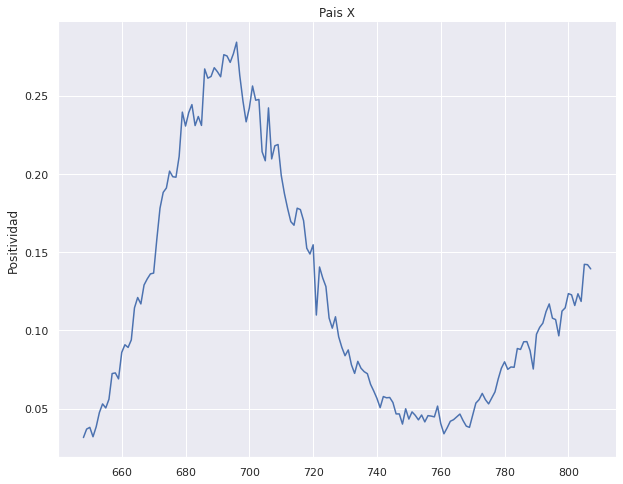

In [13]:
fig, ax = plt.subplots(figsize=(10, 8))
meandpos["positividad pcr"].plot(ax=ax)
ax.set(ylabel="Positividad", title="Pais X")
sns.despine()

In [31]:
sns.set()
np.random.seed(101)

model = """
data {
  int<lower=0> N;
  vector[N] x;
  vector[N] z;
  //vector[N] y;
}
generated quantities {
  real sigma = normal_rng(0, 1);
  real alpha = normal_rng(0, 1);
  real beta = normal_rng(0, 1);
  real gamma = normal_rng(0, 1);
  //real y_sim = normal_rng(alpha + beta * x + gamma * z, sigma);
}
"""

In [32]:
x = meandpos["casos pcr"]
z = meandpos["pcr"]
y = meandpos["positividad pcr"]

In [35]:
data = {'N': len(x), 'x': x,'z': z, 'y': y}

sm = stan.StanModel(model_code=model)

fit = sm.sampling(data=data, iter=2000, chains=4, warmup=1, thin=1, seed=101, algorithm = "Fixed_param")

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_7dabfec31b13d7ce8bfa707cec5caae5 NOW.


In [36]:
az.summary(fit)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
sigma,0.007,0.994,-1.809,1.924,0.011,0.008,7755.0,7973.0,1.0
alpha,0.002,0.992,-1.834,1.861,0.011,0.008,7859.0,7754.0,1.0
beta,-0.001,1.003,-1.875,1.885,0.012,0.008,7109.0,7445.0,1.0
gamma,0.008,0.991,-1.991,1.742,0.011,0.008,7993.0,7646.0,1.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9b8630a450>,
      dtype=object)

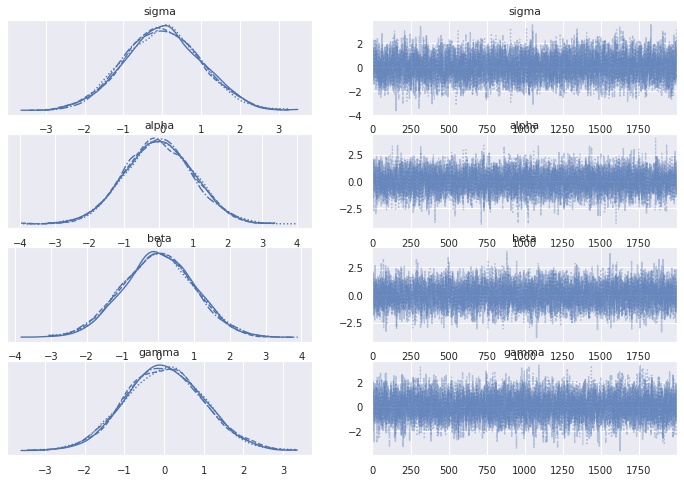

In [37]:
az.plot_trace(fit)